In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
# Retrieve data
dfa = pd.read_csv('raw-data.csv')

# Set time as index
dfa['time'] = pd.to_datetime(dfa['ts'],unit='ms')
dfa.set_index('time', inplace=True)
dfa.drop(columns=['ts'], inplace=True)

In [3]:
dfa.head()

,id,value,label
time,,,
2020-04-23 11:13:54.617,pump-1,18.340181,0
2020-04-23 11:13:57.999,pump-2,12.703972,0
2020-04-23 11:13:59.618,pump-1,17.647661,0
2020-04-23 11:14:02.999,pump-2,13.805114,0
2020-04-23 11:14:04.617,pump-1,16.874933,0


In [54]:
dfa.head(40)

,id,value,label
time,,,
2020-04-23 11:13:54.617,pump-1,18.340181,0
2020-04-23 11:13:57.999,pump-2,12.703972,0
2020-04-23 11:13:59.618,pump-1,17.647661,0
2020-04-23 11:14:02.999,pump-2,13.805114,0
2020-04-23 11:14:04.617,pump-1,16.874933,0
2020-04-23 11:14:07.999,pump-2,15.415206,0
2020-04-23 11:14:09.617,pump-1,16.180807,0
2020-04-23 11:14:12.999,pump-2,15.922729,0
2020-04-23 11:14:14.618,pump-1,15.407113,0


In [55]:
df_healthy = dfa[dfa['label'] == 0]

In [56]:
df_healthy

,id,value,label
time,,,
2020-04-23 11:13:54.617,pump-1,18.340181,0
2020-04-23 11:13:57.999,pump-2,12.703972,0
2020-04-23 11:13:59.618,pump-1,17.647661,0
2020-04-23 11:14:02.999,pump-2,13.805114,0
2020-04-23 11:14:04.617,pump-1,16.874933,0
...,...,...,...
2020-04-23 13:19:34.617,pump-1,16.053479,0
2020-04-23 13:19:39.617,pump-1,15.709151,0
2020-04-23 13:19:42.999,pump-2,16.214949,0


In [57]:
df = df_healthy.loc[df_healthy['id'] == 'pump-2']
df = df_healthy.drop(columns=['id','label'])
df.head()

,value
time,
2020-04-23 11:13:54.617,18.340181
2020-04-23 11:13:57.999,12.703972
2020-04-23 11:13:59.618,17.647661
2020-04-23 11:14:02.999,13.805114
2020-04-23 11:14:04.617,16.874933


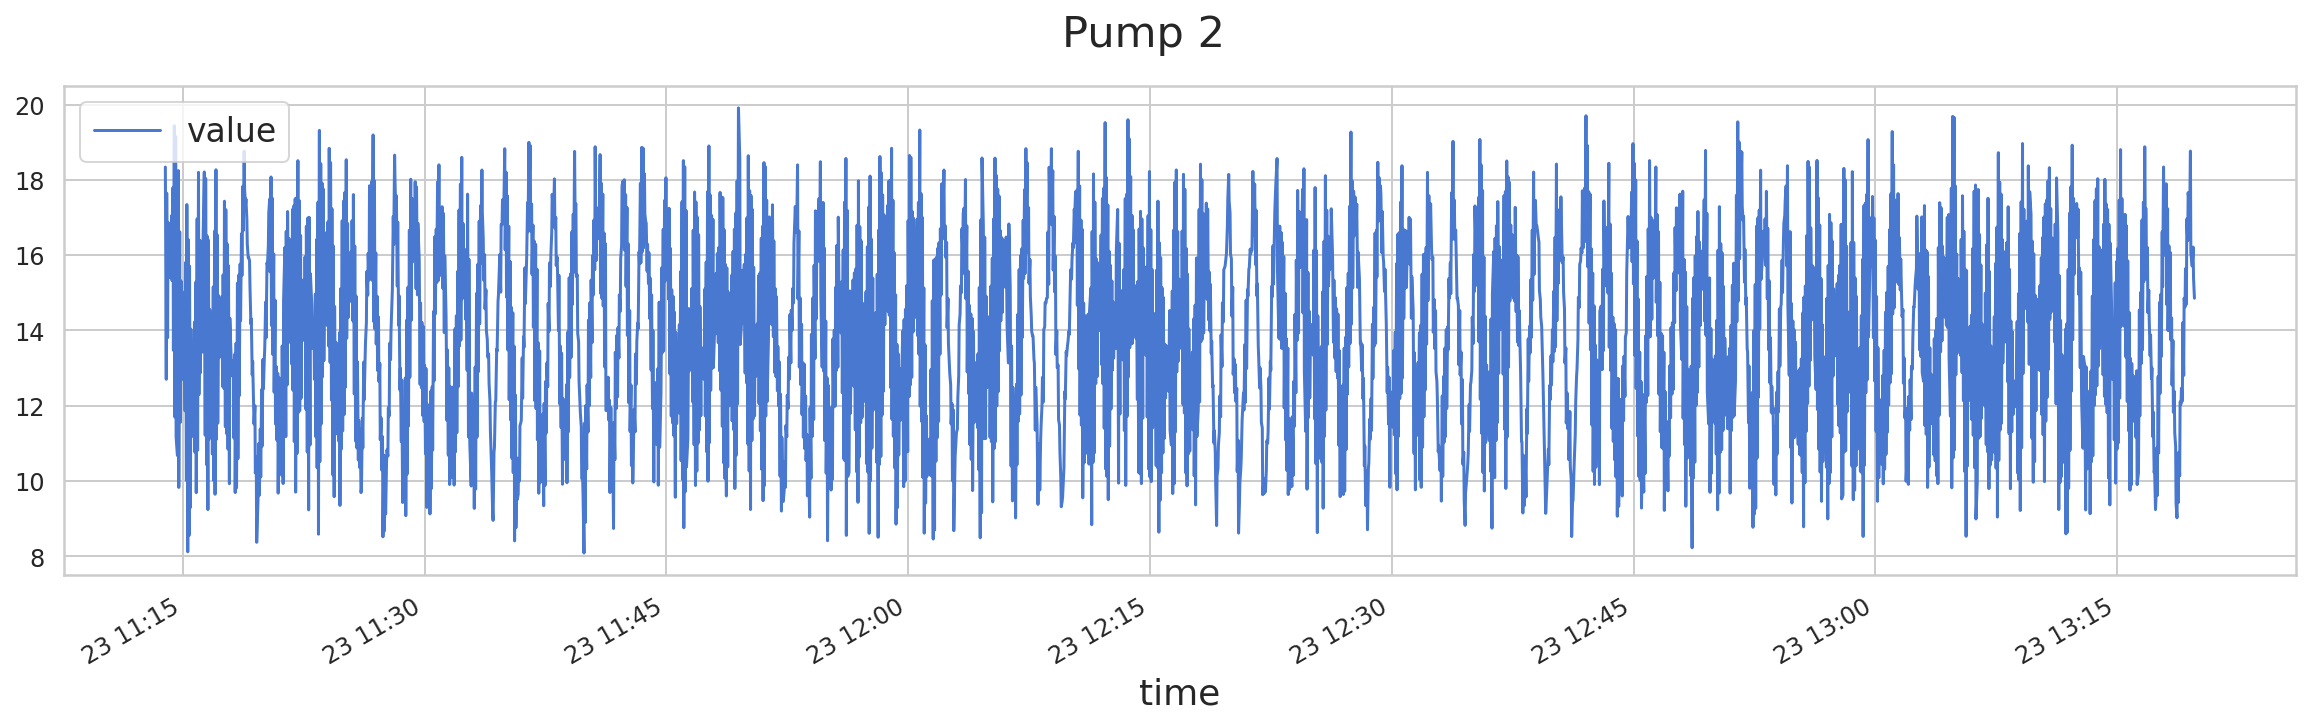

In [58]:
df.plot(figsize=(20,5),  fontsize=12,subplots=True,  title = "Pump 2")
plt.show()

In [4]:
df = dfa.loc[dfa['id'] == 'pump-2']
df = dfa.drop(columns=['id','label'])
df.head()

,value
time,
2020-04-23 11:13:54.617,18.340181
2020-04-23 11:13:57.999,12.703972
2020-04-23 11:13:59.618,17.647661
2020-04-23 11:14:02.999,13.805114
2020-04-23 11:14:04.617,16.874933


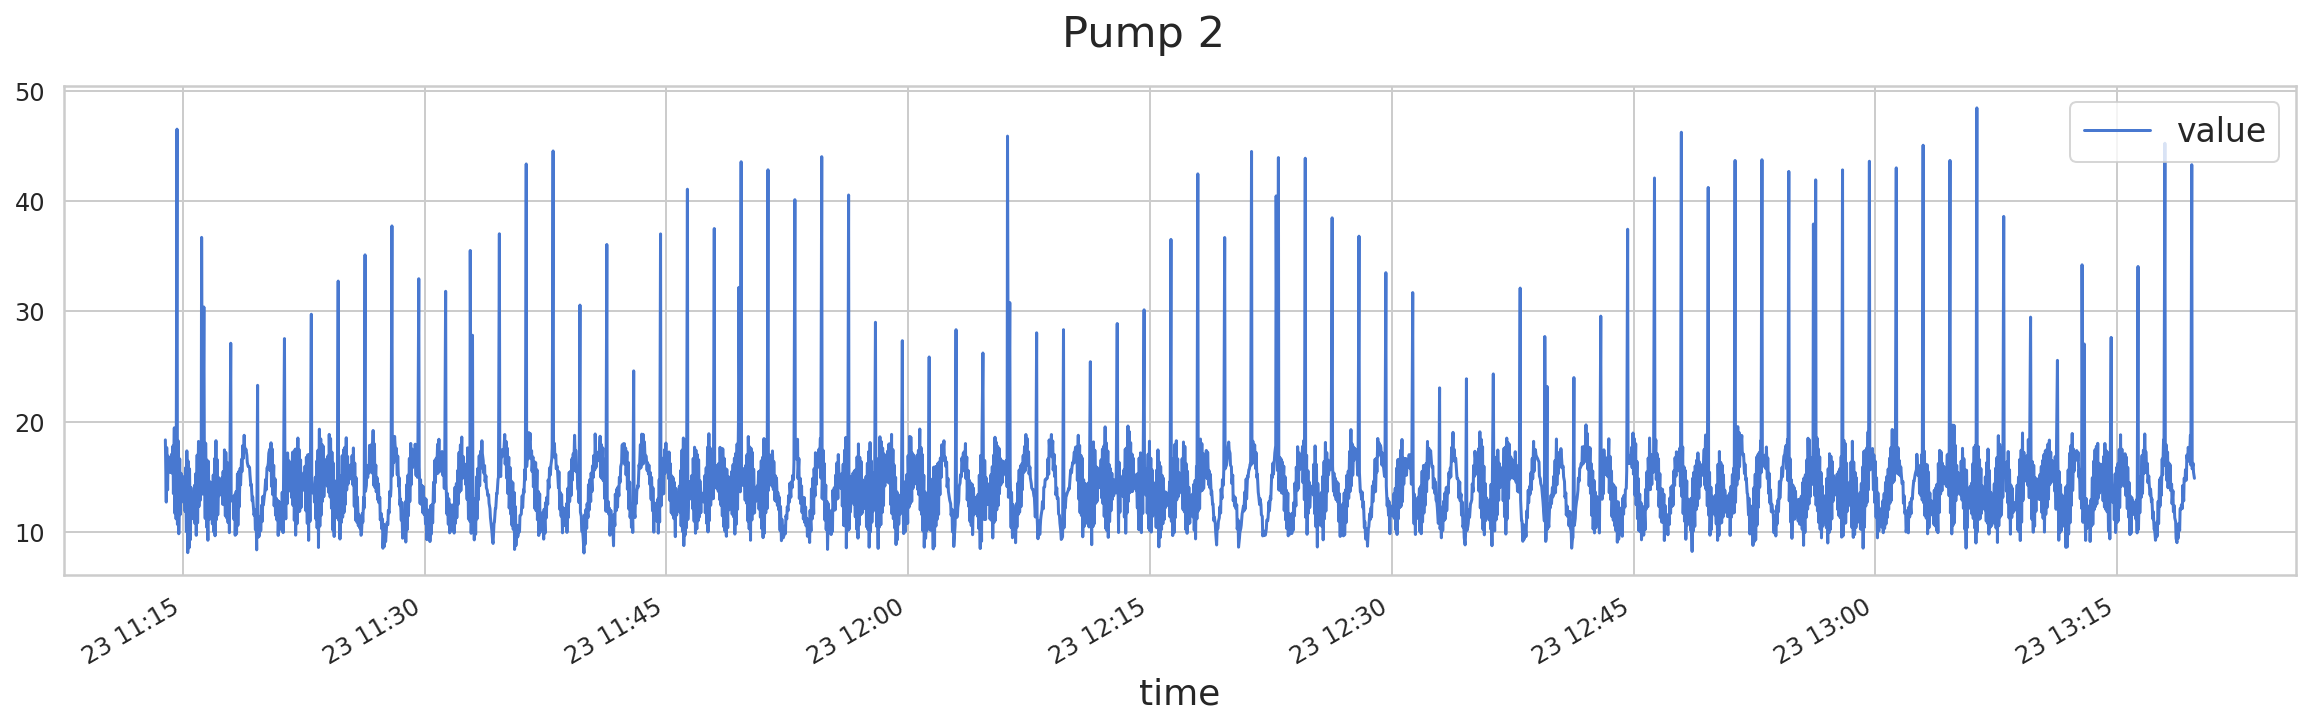

In [5]:
df.plot(figsize=(20,5),  fontsize=12,subplots=True,  title = "Pump 2")
plt.show()

In [6]:
train_size = int(len(df) * 0.95)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(2870, 1) (152, 1)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train[['value']])

train['value'] = scaler.transform(train[['value']])
test['value'] = scaler.transform(test[['value']])

/home/sbergste/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/sbergste/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [10]:
train

,value
time,
2020-04-23 11:13:54.617,0.863379
2020-04-23 11:13:57.999,-0.380546
2020-04-23 11:13:59.618,0.710538
2020-04-23 11:14:02.999,-0.137521
2020-04-23 11:14:04.617,0.539995
...,...
2020-04-23 13:13:17.999,-0.448258
2020-04-23 13:13:19.617,-1.168616
2020-04-23 13:13:22.999,-0.332279


In [11]:
train[['value']]

,value
time,
2020-04-23 11:13:54.617,0.863379
2020-04-23 11:13:57.999,-0.380546
2020-04-23 11:13:59.618,0.710538
2020-04-23 11:14:02.999,-0.137521
2020-04-23 11:14:04.617,0.539995
...,...
2020-04-23 13:13:17.999,-0.448258
2020-04-23 13:13:19.617,-1.168616
2020-04-23 13:13:22.999,-0.332279


In [12]:
train.value

time
2020-04-23 11:13:54.617    0.863379
2020-04-23 11:13:57.999   -0.380546
2020-04-23 11:13:59.618    0.710538
2020-04-23 11:14:02.999   -0.137521
2020-04-23 11:14:04.617    0.539995
                             ...   
2020-04-23 13:13:17.999   -0.448258
2020-04-23 13:13:19.617   -1.168616
2020-04-23 13:13:22.999   -0.332279
2020-04-23 13:13:24.617   -0.863936
2020-04-23 13:13:27.999    0.107274
Name: value, Length: 2870, dtype: float64

In [15]:
TIME_STEPS = 5

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train[['value']], train.value, TIME_STEPS)
X_test, y_test = create_dataset(test[['value']], test.value, TIME_STEPS)

print(X_train.shape)

(2865, 5, 1)


In [16]:
X_train

array([[[ 0.86337884],
        [-0.38054602],
        [ 0.71053801],
        [-0.13752134],
        [ 0.53999509]],

       [[-0.38054602],
        [ 0.71053801],
        [-0.13752134],
        [ 0.53999509],
        [ 0.21782983]],

       [[ 0.71053801],
        [-0.13752134],
        [ 0.53999509],
        [ 0.21782983],
        [ 0.38679981]],

       ...,

       [[-0.7065398 ],
        [-0.87960999],
        [-0.790301  ],
        [-0.44825774],
        [-1.16861582]],

       [[-0.87960999],
        [-0.790301  ],
        [-0.44825774],
        [-1.16861582],
        [-0.33227863]],

       [[-0.790301  ],
        [-0.44825774],
        [-1.16861582],
        [-0.33227863],
        [-0.86393615]]])

In [17]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64, 
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')

In [52]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=1,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/200
2578/2578 [==============================] - 10s 4ms/step - loss: 0.2938 - val_loss: 0.2908
Epoch 2/200
2578/2578 [==============================] - 9s 4ms/step - loss: 0.2743 - val_loss: 0.2887
Epoch 3/200
2578/2578 [==============================] - 9s 4ms/step - loss: 0.2726 - val_loss: 0.2911
Epoch 4/200
2578/2578 [==============================] - 9s 4ms/step - loss: 0.2718 - val_loss: 0.2855
Epoch 5/200
2578/2578 [==============================] - 9s 4ms/step - loss: 0.2721 - val_loss: 0.2919
Epoch 6/200
2578/2578 [==============================] - 10s 4ms/step - loss: 0.2710 - val_loss: 0.2941
Epoch 7/200
2578/2578 [==============================] - 10s 4ms/step - loss: 0.2708 - val_loss: 0.2943
Epoch 8/200
2578/2578 [==============================] - 9s 4ms/step - loss: 0.2711 - val_loss: 0.2939
Epoch 9/200
2578/2578 [==============================] - 9s 4ms/step - loss: 0.2692 - val_loss: 0.2954
Epoch 10/200
2578/2578 [==============================] - 10s 4ms/step

KeyboardInterrupt: 

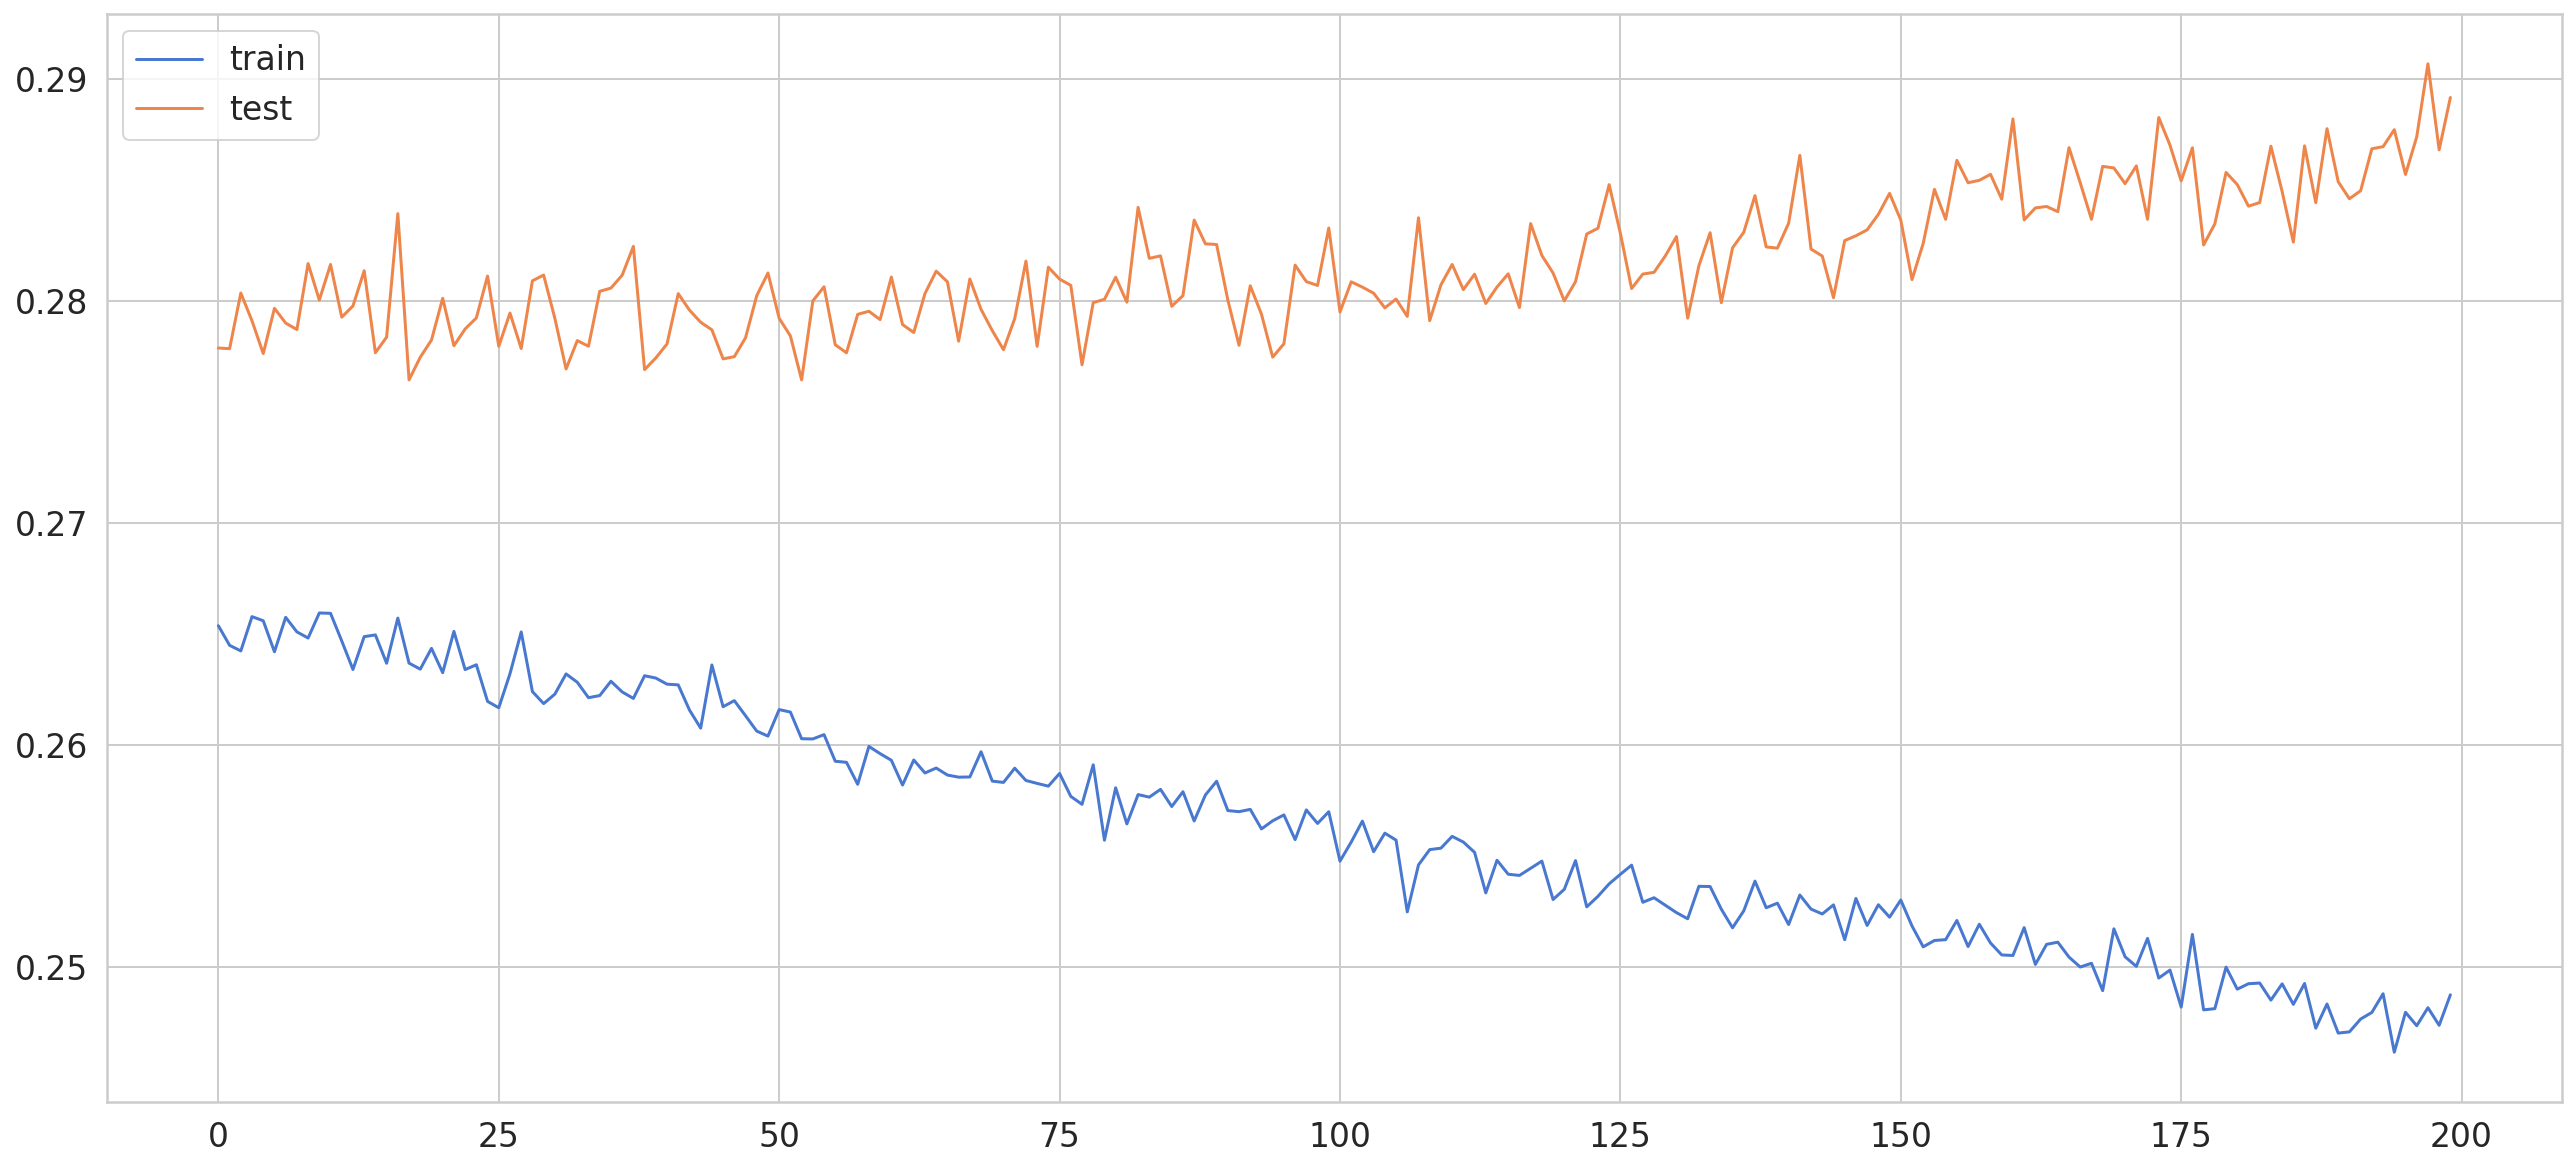

In [51]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [22]:
X_train_pred = model.predict(X_train)

train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

In [23]:
X_train.shape

(2865, 5, 1)

In [24]:
X_train_pred.shape

(2865, 5, 1)

In [26]:
print(X_train[0, 4, 0])

0.5399950877498861


In [27]:
X_train[0]

array([[ 0.86337884],
       [-0.38054602],
       [ 0.71053801],
       [-0.13752134],
       [ 0.53999509]])

In [28]:
X_train_pred[0]

array([[0.06555661],
       [0.07110424],
       [0.0719197 ],
       [0.06939691],
       [0.06651249]], dtype=float32)

In [29]:
np.mean(np.abs(X_train_pred[0] - X_train[0]))

0.5136983300599776

In [30]:
X = np.asarray([X_train[0]])

In [31]:
X

array([[[ 0.86337884],
        [-0.38054602],
        [ 0.71053801],
        [-0.13752134],
        [ 0.53999509]]])

In [32]:
t = model.predict(X)

In [33]:
t

array([[[0.06555665],
        [0.07110428],
        [0.07191973],
        [0.06939694],
        [0.06651253]]], dtype=float32)

In [34]:
train_mae_loss

array([[0.51369833],
       [0.39370914],
       [0.23806539],
       ...,
       [0.55136953],
       [0.29965936],
       [0.52826524]])

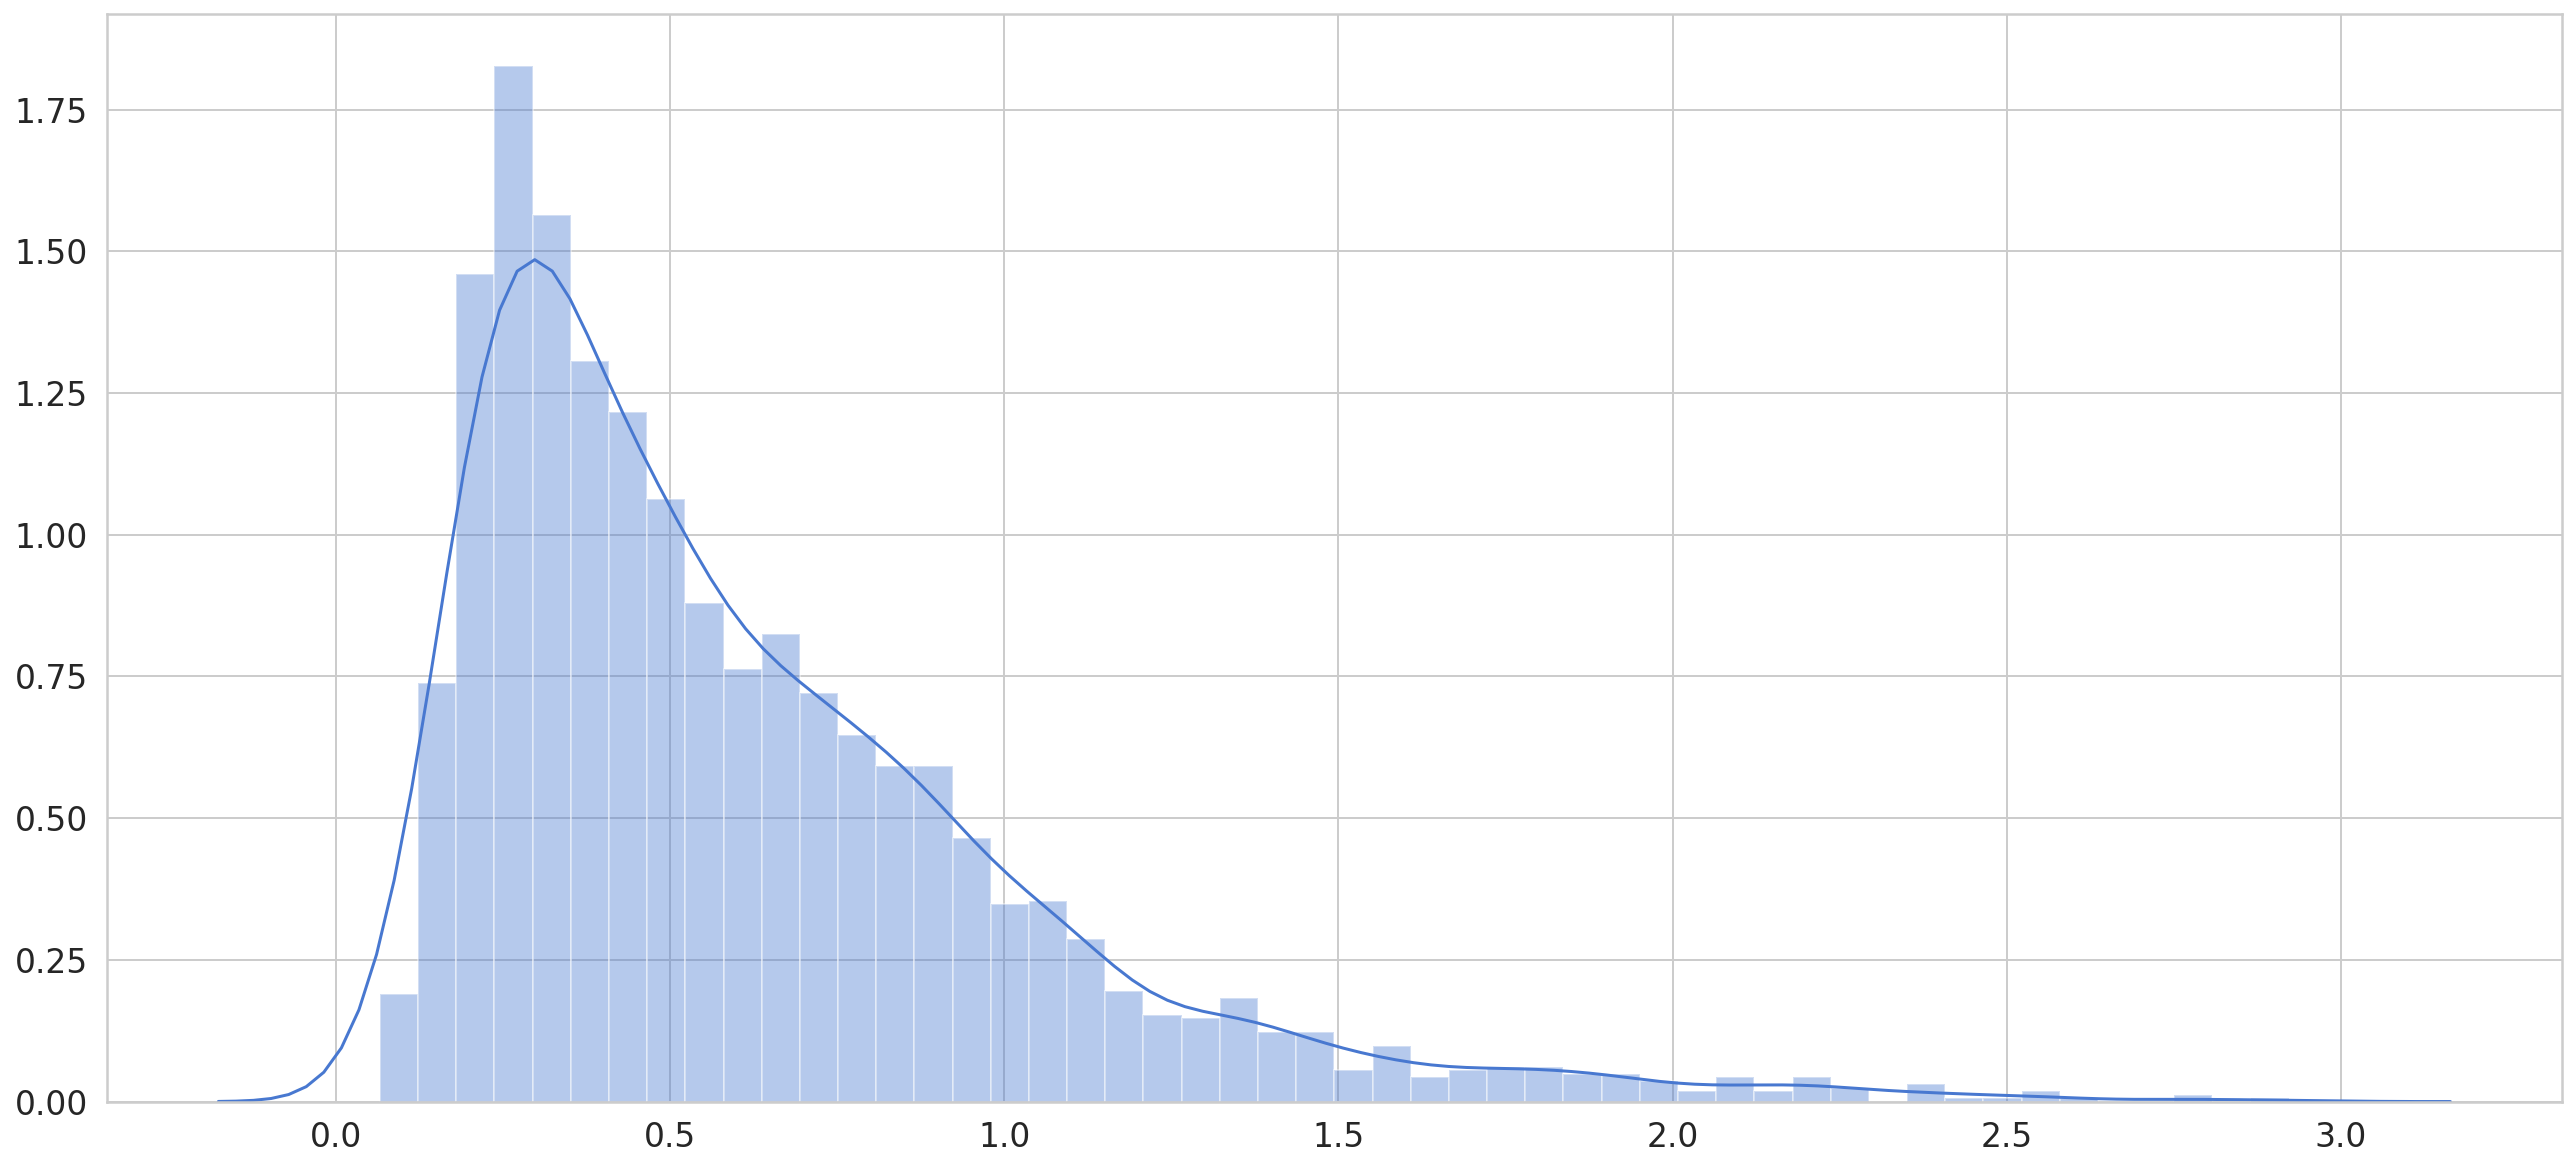

In [35]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [36]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

In [46]:
THRESHOLD = 1.0

test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['value'] = test[TIME_STEPS:].value

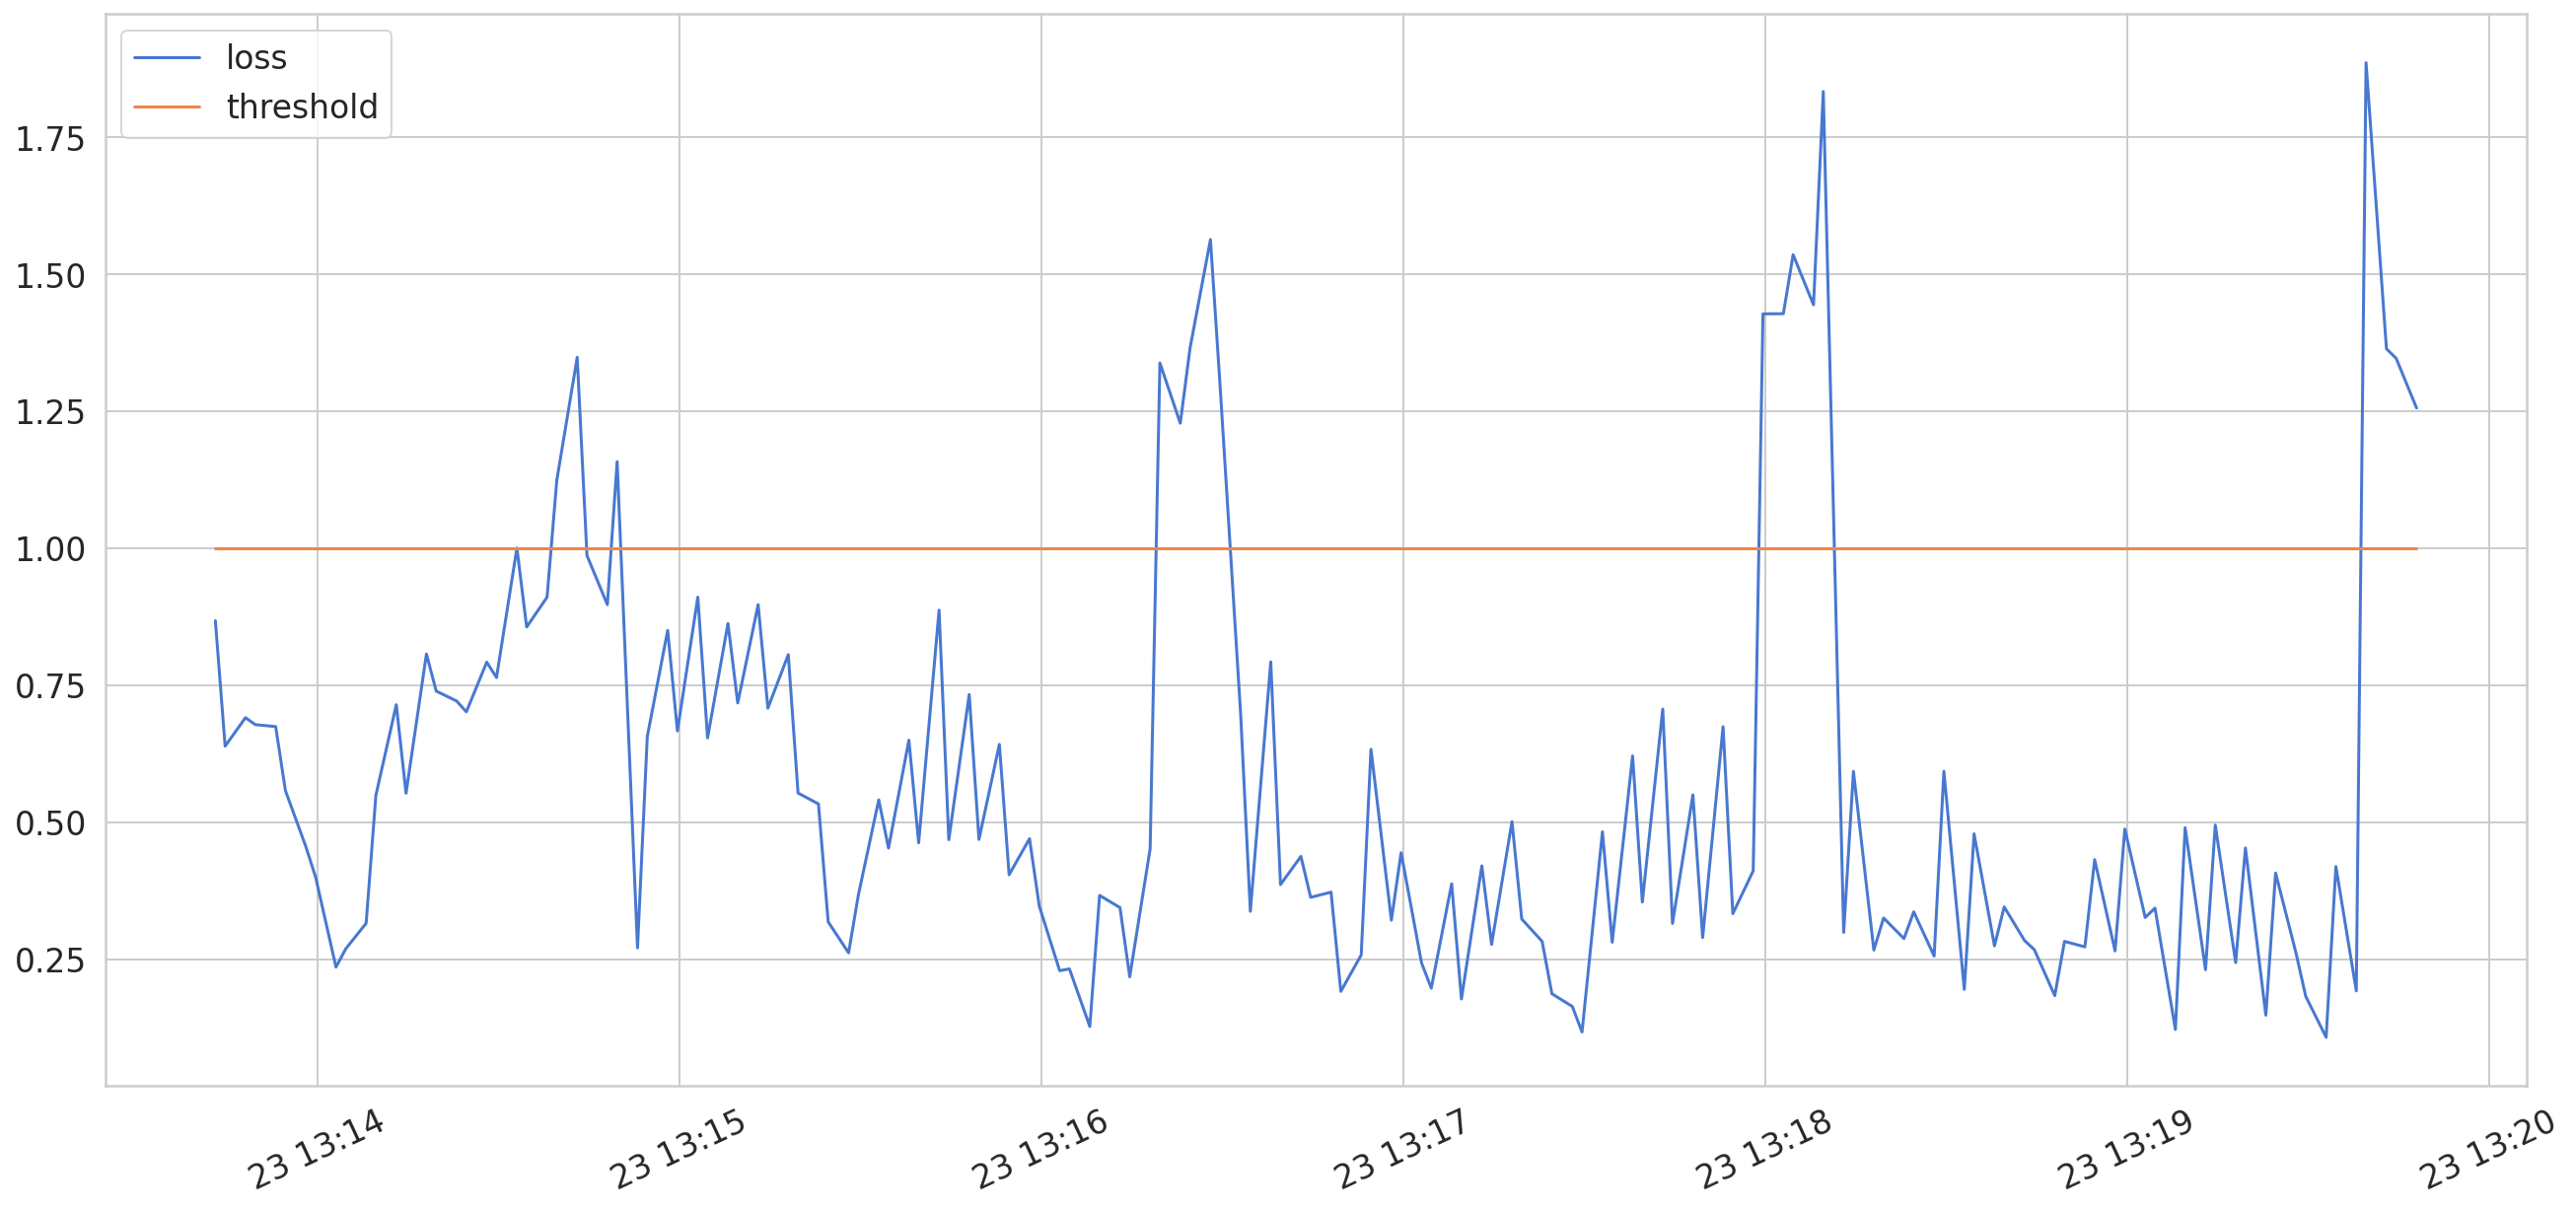

In [47]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [48]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

,loss,threshold,anomaly,value
time,,,,
2020-04-23 13:14:32.999,1.000583,1.0,True,-1.117059
2020-04-23 13:14:39.617,1.124650,1.0,True,0.038342
2020-04-23 13:14:42.999,1.348756,1.0,True,-0.380335
2020-04-23 13:14:49.618,1.158273,1.0,True,-0.735953
2020-04-23 13:16:19.617,1.338436,1.0,True,-0.928164


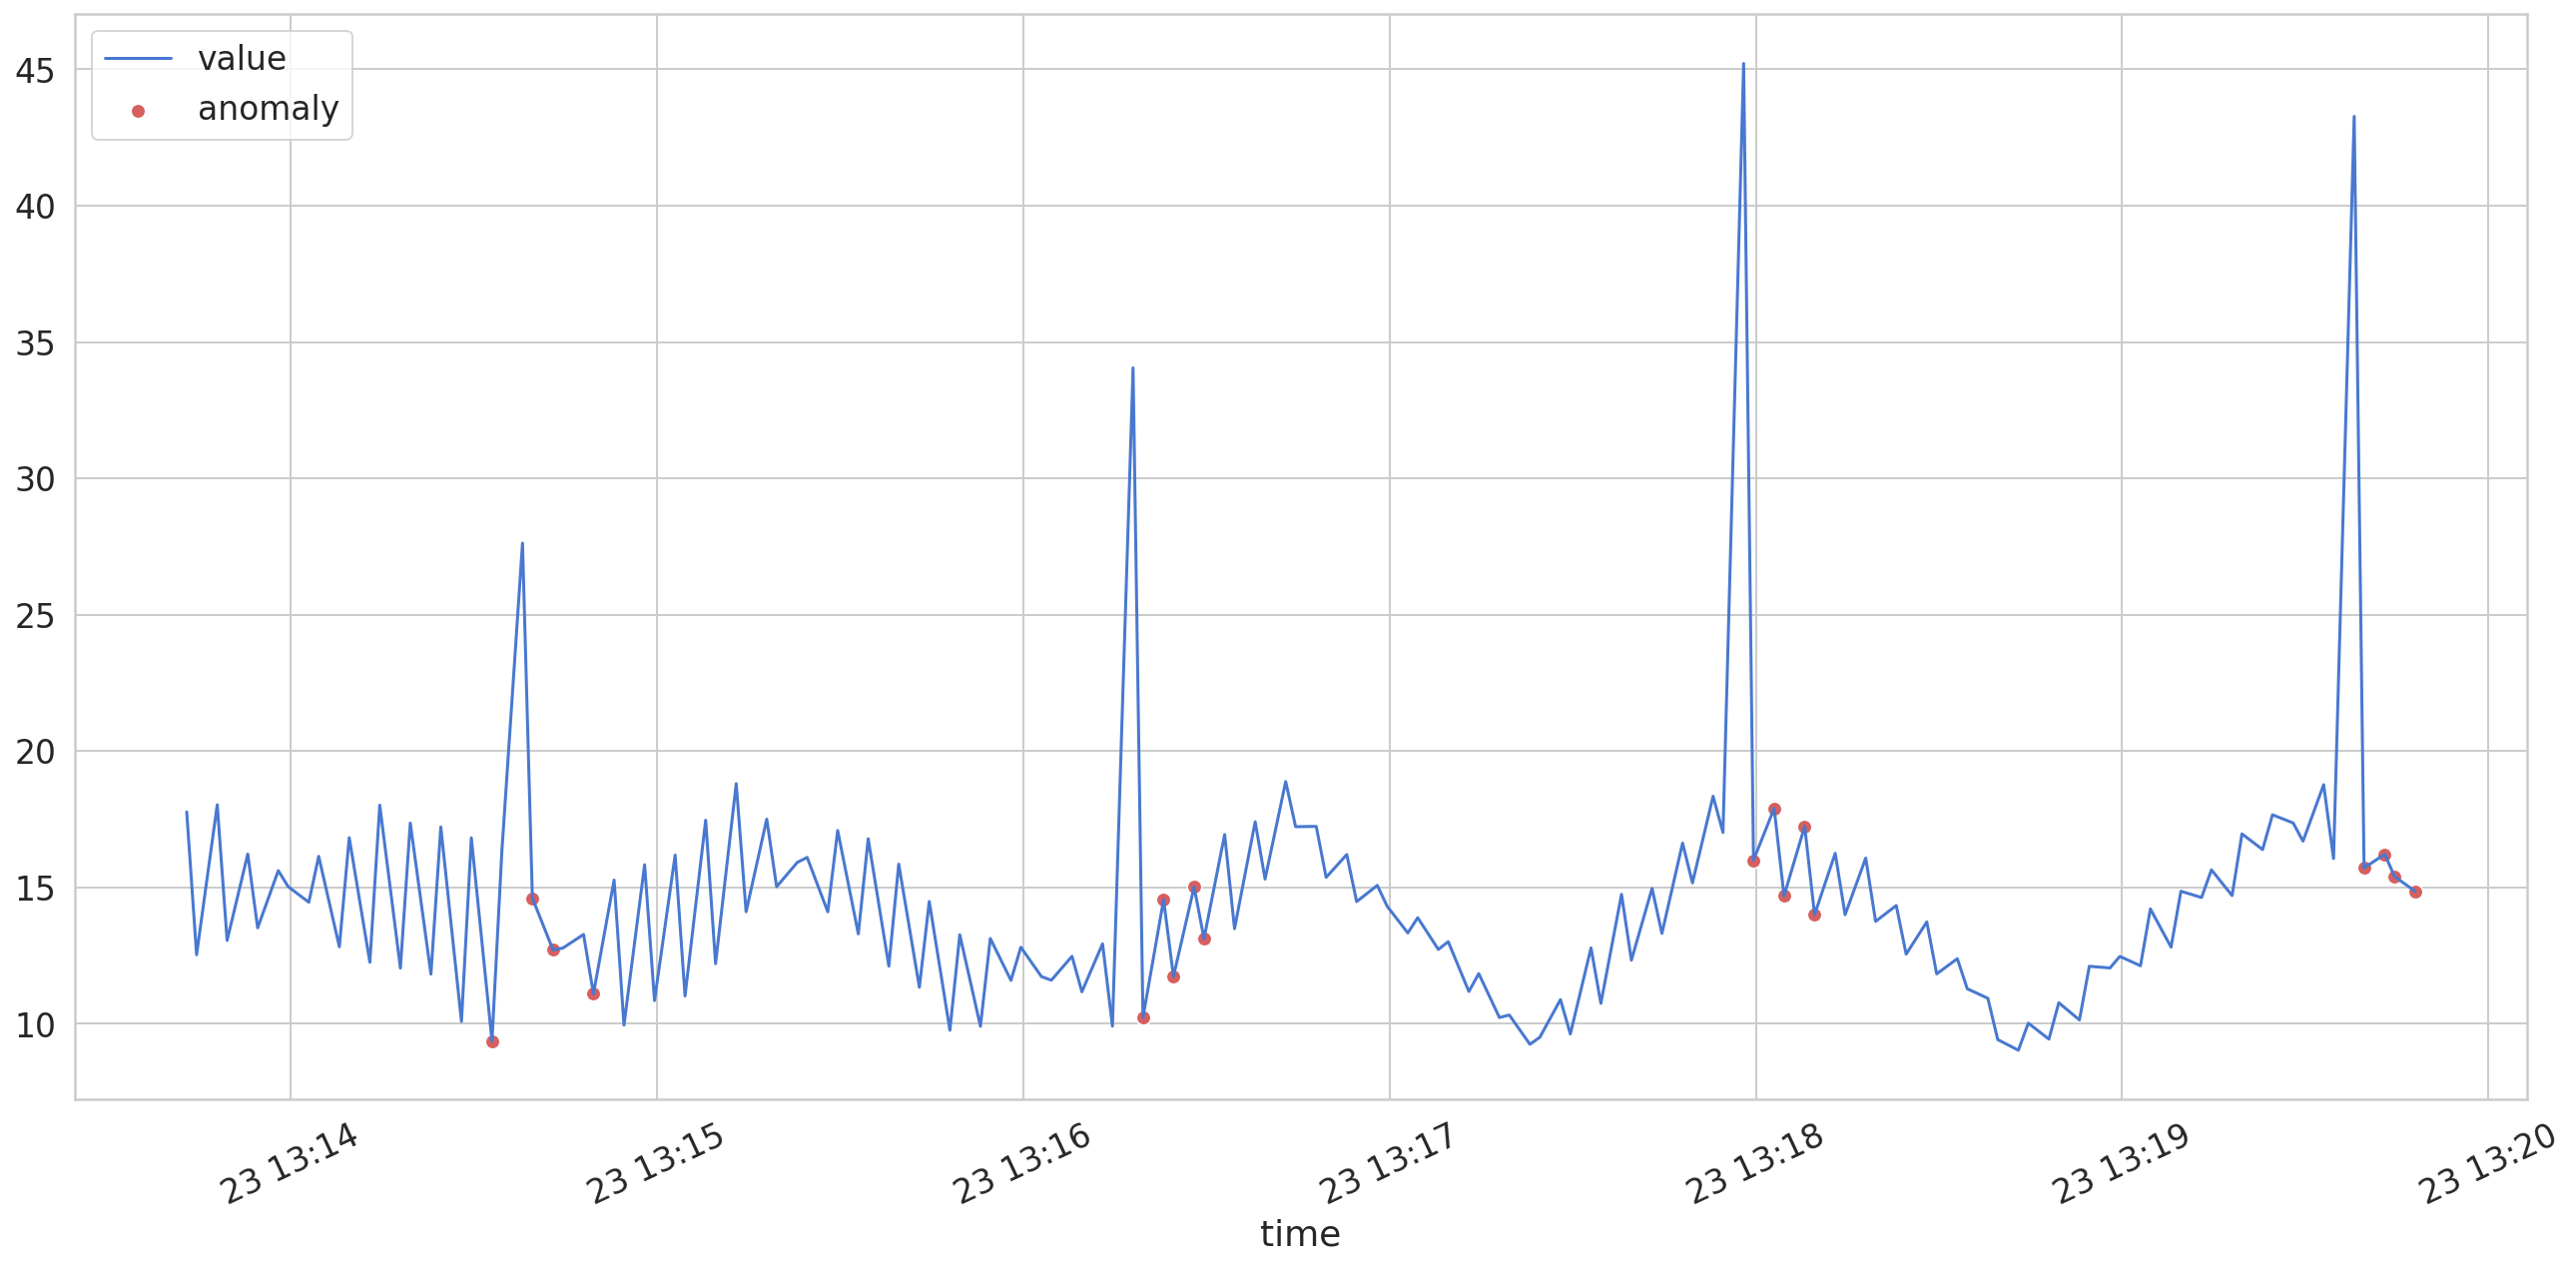

In [49]:
plt.plot(
  test[TIME_STEPS:].index, 
  scaler.inverse_transform(test[TIME_STEPS:].value), 
  label='value'
);

sns.scatterplot(
  anomalies.index,
  scaler.inverse_transform(anomalies.value),
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.xticks(rotation=25)
plt.legend();